In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import calendar
import seaborn as sns
import seaborn_image as isns

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ph_Baseline_2.6_cropped.nc')
data_baseline = xr.open_dataset(dataset)

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
dataset_oae = (r'/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/ph_OAE_2.6_cropped.nc')
data_oae = xr.open_dataset(dataset_oae)

### EU Seasonal Average of pH

In [5]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [6]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [7]:
data_baseline_plot = data_baseline.ph.mean(dim=('y', 'x'))
data_oae_plot = data_oae.ph.mean(dim=('y', 'x'))

In [8]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

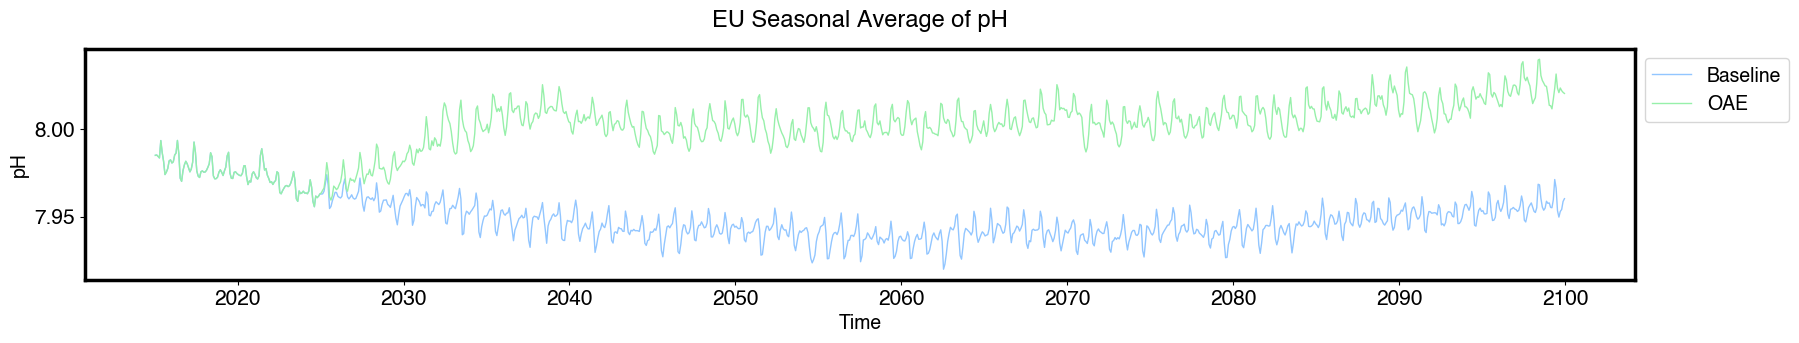

In [9]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [10]:
sliced_frame_baseline_plot = sliced_frame_baseline.ph.mean(dim=('y', 'x'))
sliced_frame_oae_plot = sliced_frame_oae.ph.mean(dim=('y', 'x'))

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

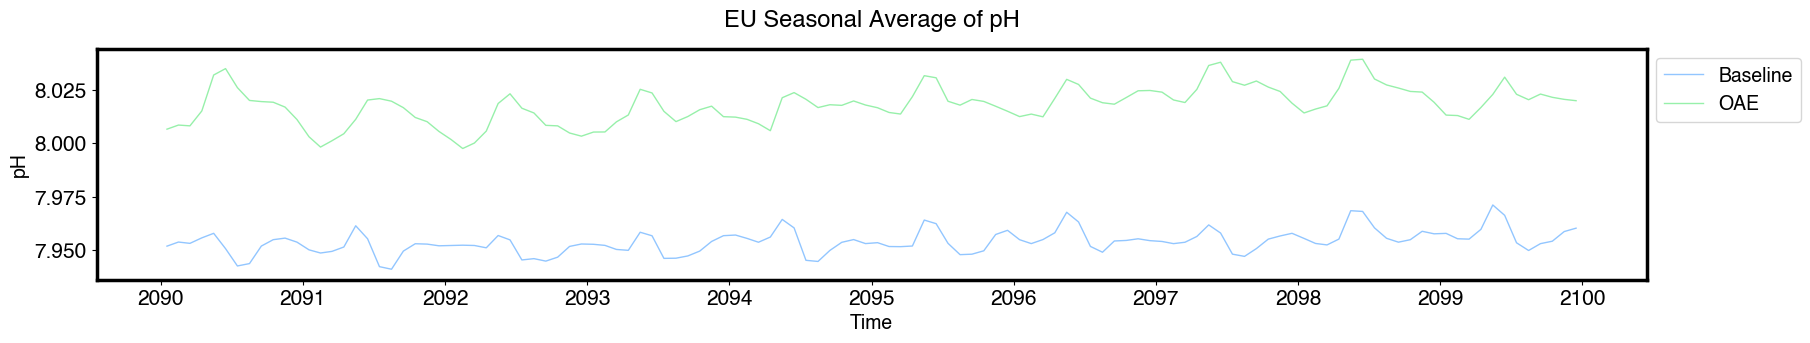

In [12]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ph, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of pH', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of pH

In [13]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_baseline = data_baseline["ph"].sel(time_counter=slice(start_date, end_date))

In [14]:
ph_season_summary_baseline = ph_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_baseline = ph_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_baseline = ph_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x"])

In [15]:
start_date = "2090-01-01"
end_date = "2100-01-01"

ph_oae = data_oae["ph"].sel(time_counter=slice(start_date, end_date))

In [16]:
ph_season_summary_oae = ph_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
ph_season_mean_all_years_oae = ph_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
ph_seasonal_mean_oae = ph_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x"])

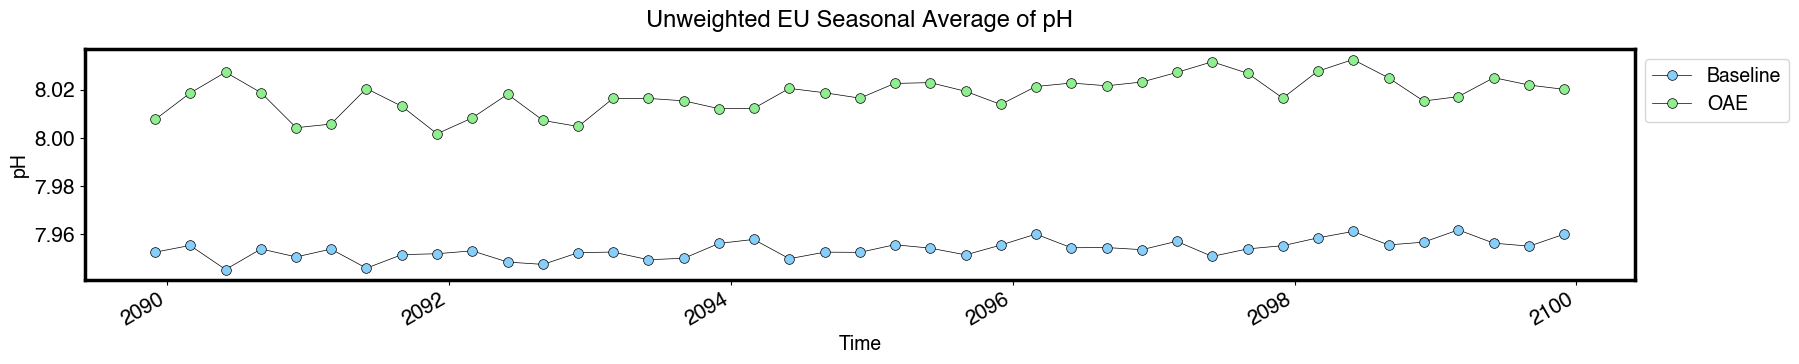

In [17]:
f, ax = plt.subplots(figsize=(20, 3))

ph_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of pH", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of pH

In [18]:
month_length_baseline = ph_baseline.time_counter.dt.days_in_month
ph_weighted_mean_baseline = ((ph_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_baseline = ph_weighted_mean_baseline.where(ph_weighted_mean_baseline)
ph_weighted_season_baseline = ph_weighted_mean_baseline.groupby('time_counter').mean(["y", "x"])

In [19]:
month_length_oae = ph_oae.time_counter.dt.days_in_month
ph_weighted_mean_oae = ((ph_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
ph_weighted_mean_oae = ph_weighted_mean_oae.where(ph_weighted_mean_oae)
ph_weighted_season_oae = ph_weighted_mean_oae.groupby('time_counter').mean(["y", "x"])

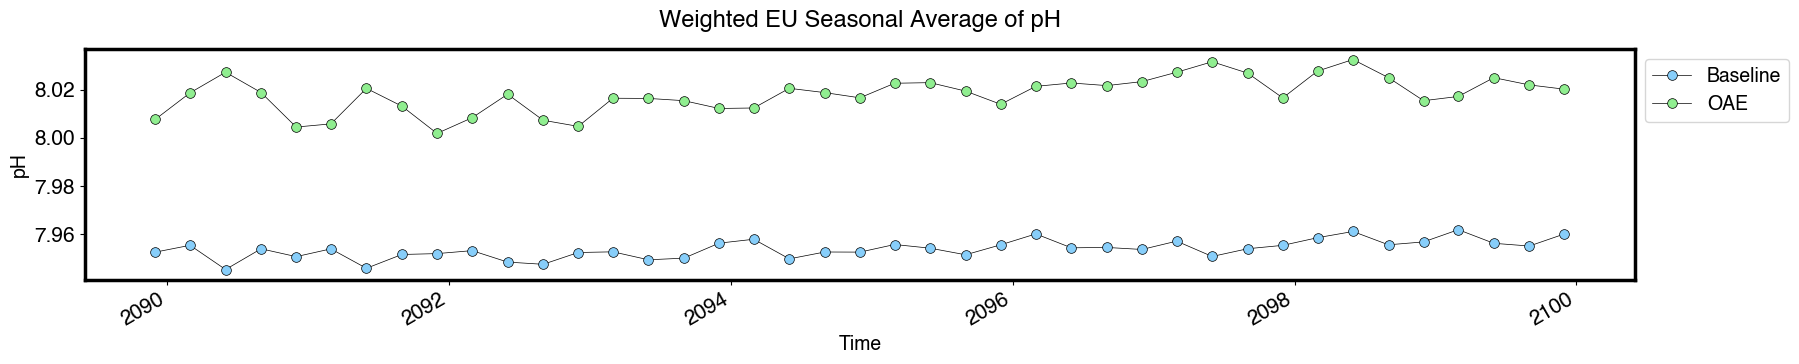

In [20]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
ph_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of pH", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of pH (seasons displayed)

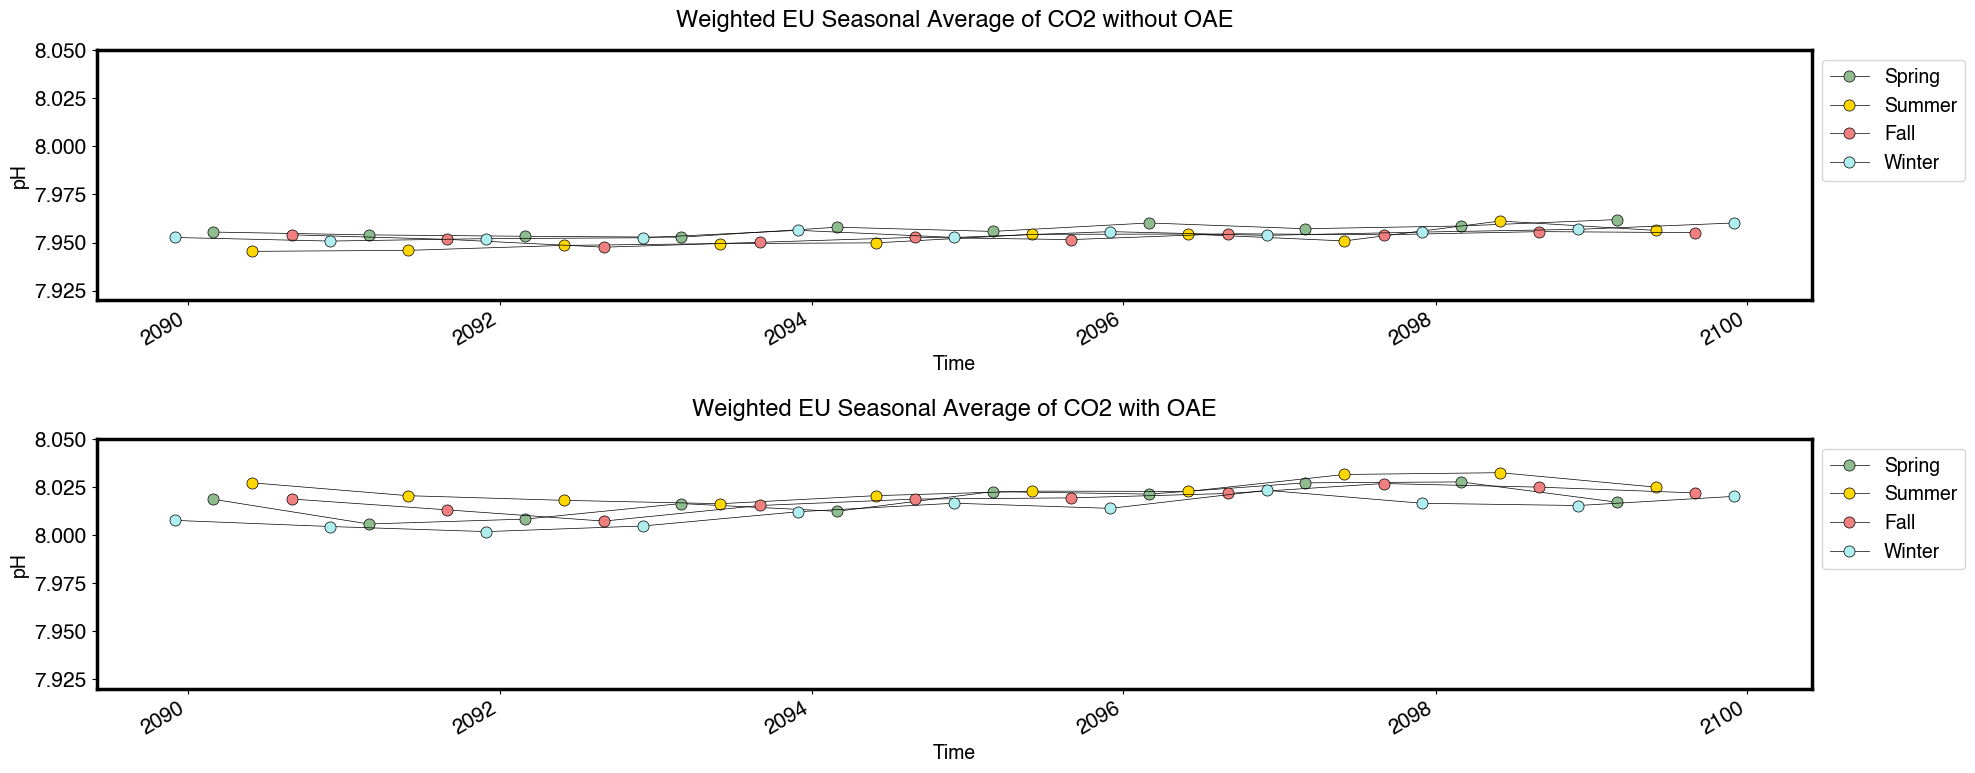

In [21]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in ph_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.set_ylim(7.92, 8.05)
ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of CO2 without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('pH', fontsize=14)

for month, arr in ph_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.set_ylim(7.92, 8.05) 
ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of CO2 with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('pH', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of pH without OAE (seasons displayed)

In [22]:
ph_weighted_baseline = ph_weighted_season_baseline.to_dataframe('ph')
ph_weighted_baseline['Month'] = pd.DatetimeIndex(ph_weighted_baseline.index).month

In [23]:
conditions = [
    (ph_weighted_baseline['Month'] == 3),
    (ph_weighted_baseline['Month'] == 6),
    (ph_weighted_baseline['Month'] == 9),
    (ph_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_baseline['Month'] = np.select(conditions, values)

In [24]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

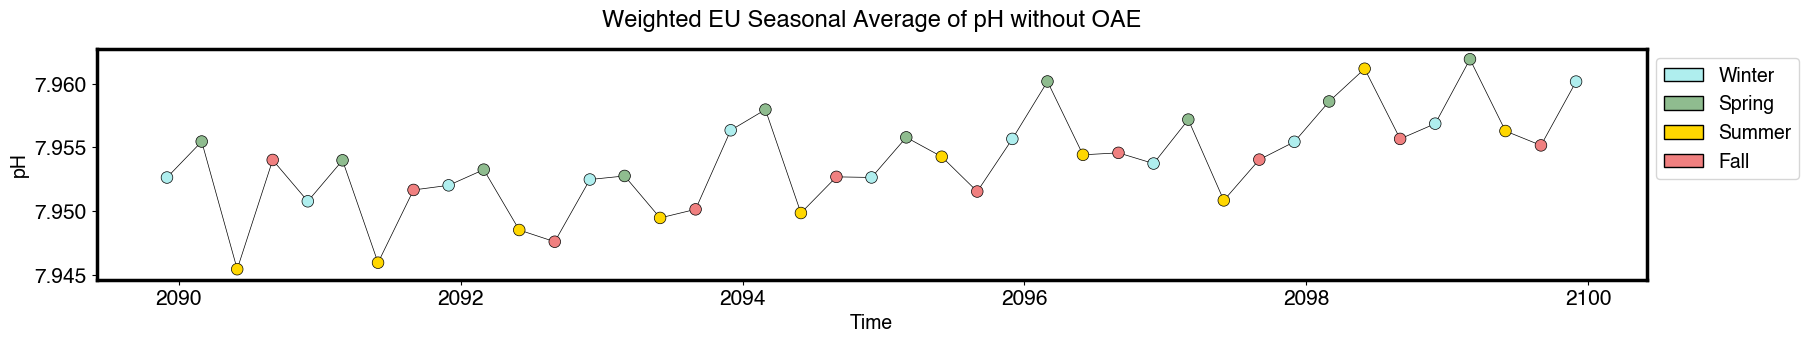

In [25]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of pH with OAE (seasons displayed)

In [26]:
ph_weighted_oae = ph_weighted_season_oae.to_dataframe('ph')
ph_weighted_oae['Month'] = pd.DatetimeIndex(ph_weighted_oae.index).month

In [27]:
conditions = [
    (ph_weighted_oae['Month'] == 3),
    (ph_weighted_oae['Month'] == 6),
    (ph_weighted_oae['Month'] == 9),
    (ph_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

ph_weighted_oae['Month'] = np.select(conditions, values)

In [28]:
colors = dict(zip(ph_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

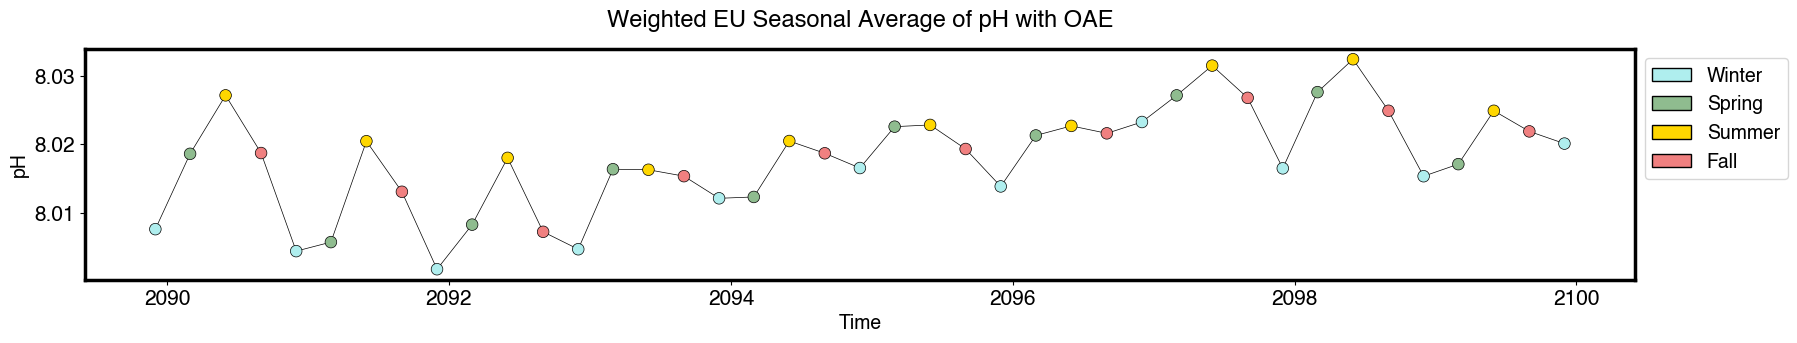

In [29]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of pH (seasons displayed)

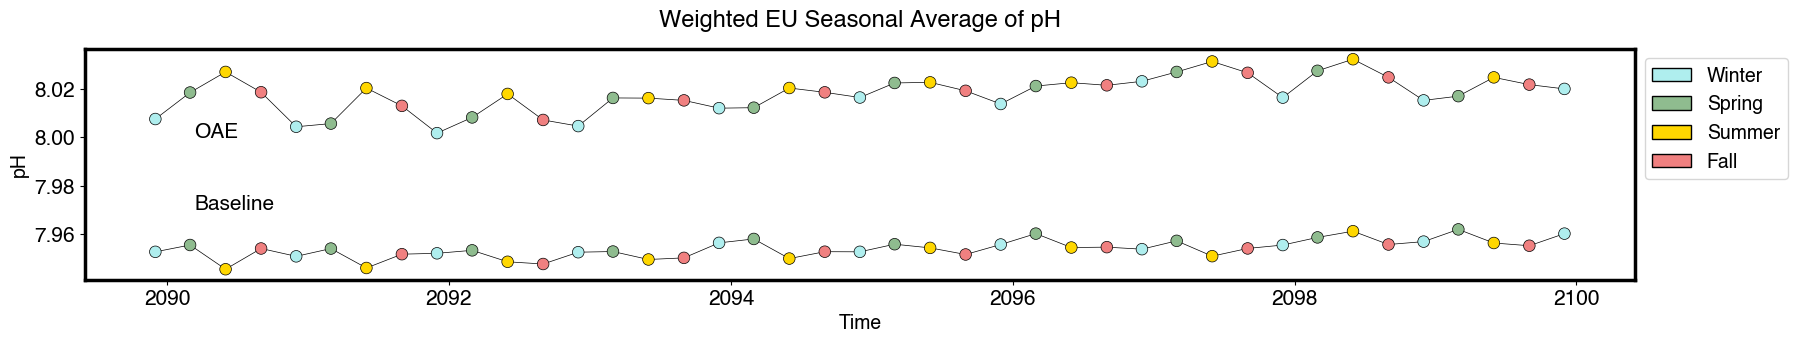

In [80]:
colors = dict(zip(ph_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_weighted_baseline.index, ph_weighted_baseline.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 7.97, s='Baseline')
ax.scatter(ph_weighted_baseline.index, ph_weighted_baseline.ph, color=ph_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(ph_weighted_oae.index, ph_weighted_oae.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(43900, 8, s='OAE')
ax.scatter(ph_weighted_oae.index, ph_weighted_oae.ph, color=ph_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH", fontsize=17, y=1.06)

#plt.savefig('EUpH_seasonal_mean.png')

pass

### EU Monthly Averaged pH for the last 10 years

In [31]:
mean_baseline = (sliced_frame_baseline.ph.mean(dim=('y', 'x'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ph.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [32]:
mean_oae = (sliced_frame_oae.ph.mean(dim=('y', 'x'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).ph.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

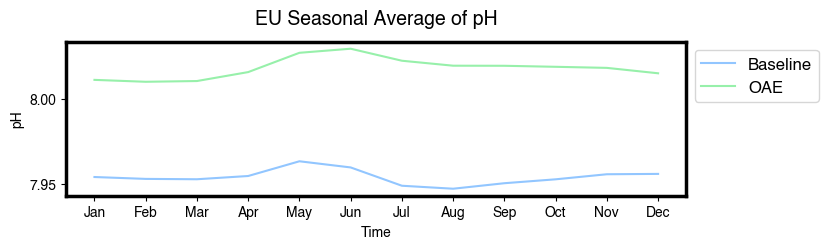

In [33]:
plt.figure(figsize=(8,2))
plt.plot(mean_baseline.ph, label='Baseline')
plt.plot(mean_oae.ph, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("pH", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of pH', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### Map of EU Seasonal Average of pH without OAE

In [34]:
month_length_baseline = sliced_frame_baseline.time_counter.dt.days_in_month 
weights_baseline = (month_length_baseline.groupby("time_counter.season") / month_length_baseline.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_baseline.groupby('time_counter.season').sum().values, np.ones(4))

In [35]:
weights_baseline = weights_baseline.to_dataset()

In [36]:
ds_weighted_baseline = (sliced_frame_baseline.ph * weights_baseline.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='ph')
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

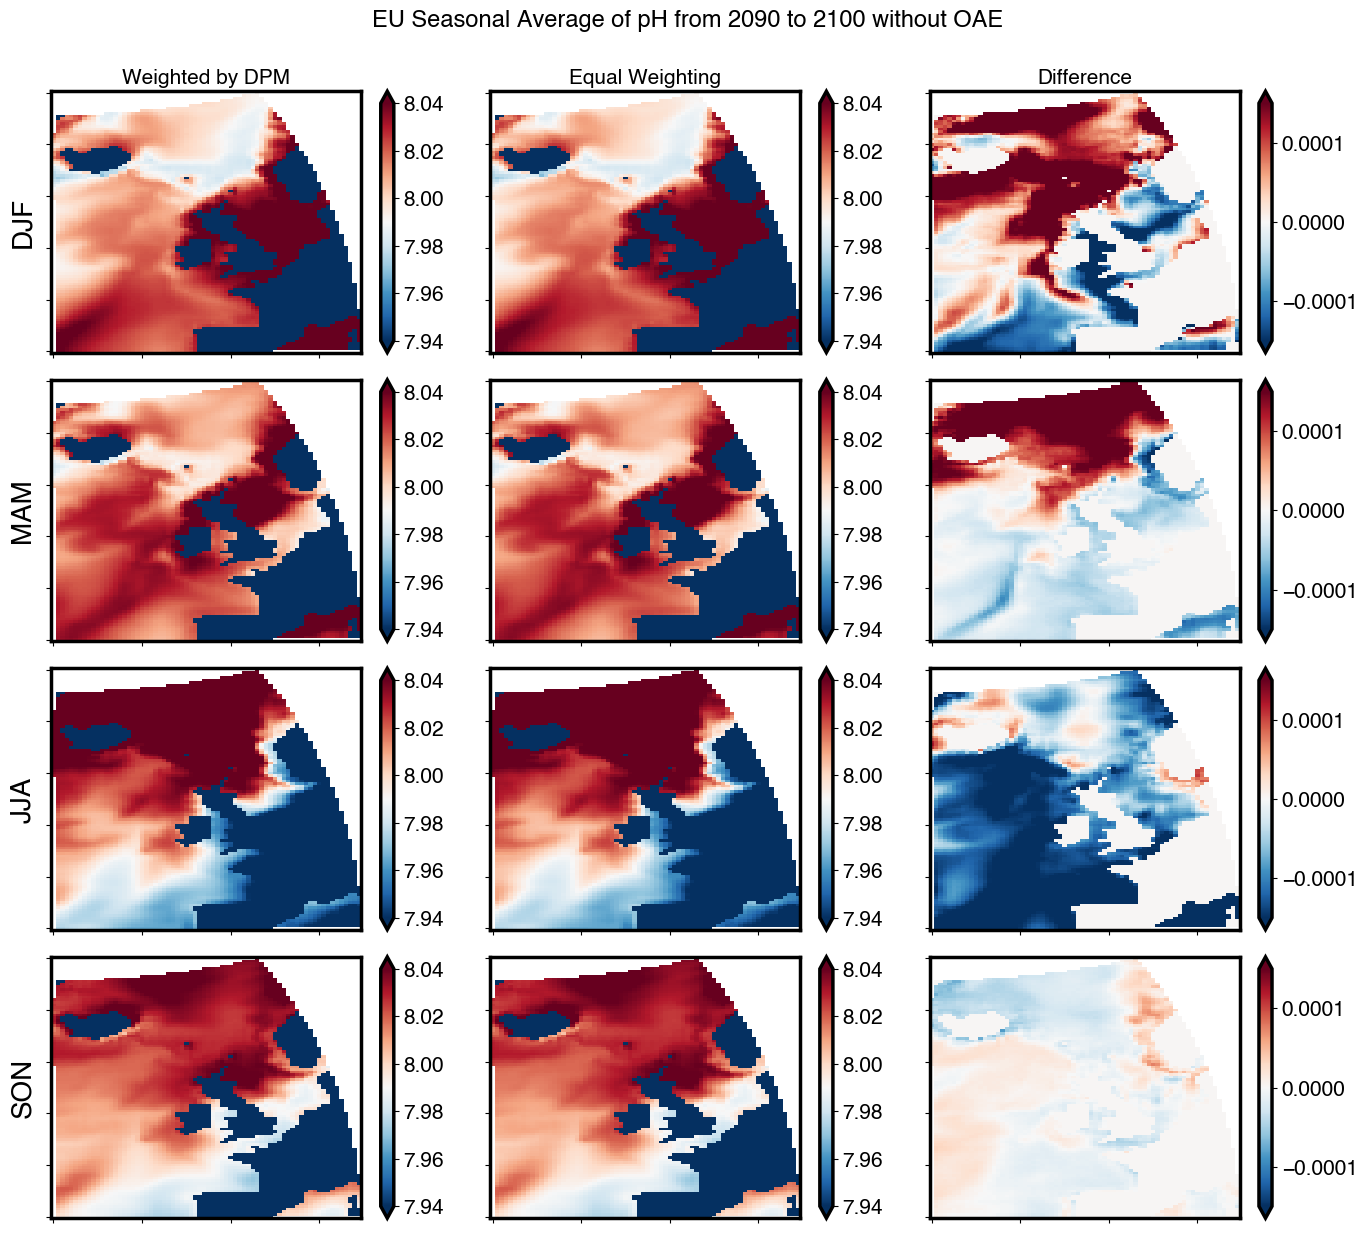

In [37]:
notnull = pd.notnull(ds_unweighted_baseline["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.94,
        vmax=8.04,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.94,
        vmax=8.04,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.00015,
        vmax=0.00015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of pH with OAE

In [38]:
month_length_oae = sliced_frame_oae.time_counter.dt.days_in_month 
weights_oae = (month_length_oae.groupby("time_counter.season") / month_length_oae.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights_oae.groupby('time_counter.season').sum().values, np.ones(4))

In [39]:
weights_oae = weights_oae.to_dataset()

In [40]:
ds_weighted_oae = (sliced_frame_oae.ph * weights_oae.days_in_month).groupby("time_counter.season").sum(dim="time_counter")
ds_weighted_oae = ds_weighted_oae.to_dataset(name='ph')
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean(dim="time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

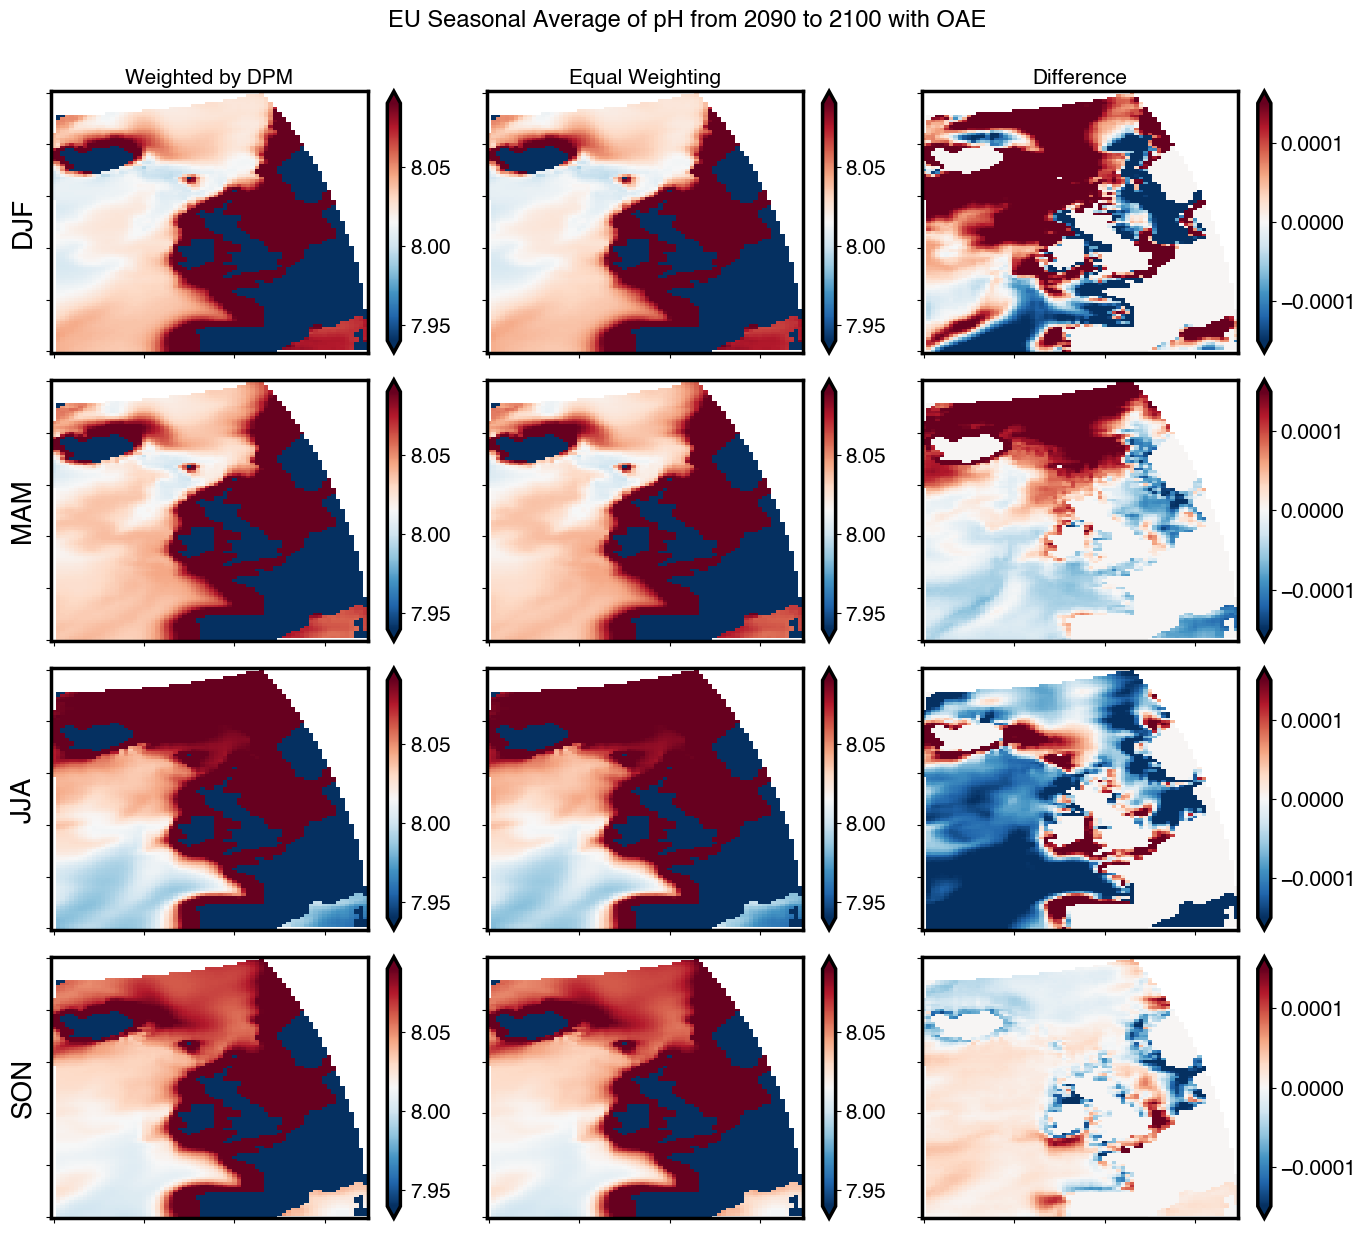

In [41]:
notnull = pd.notnull(ds_unweighted_oae["ph"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=7.94,
        vmax=8.09,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=7.94,
        vmax=8.09,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["ph"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.00015,
        vmax=0.00015,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of pH from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of pH without OAE

In [42]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

ph_baseline_month = data_baseline["ph"].sel(time_counter=slice(start_date_month, end_date_month))
ph_monthly_mean_baseline = ph_baseline_month.groupby('time_counter').mean(["y", "x"])

In [43]:
ph_oae_month = data_oae["ph"].sel(time_counter=slice(start_date_month, end_date_month))
ph_monthly_mean_oae = ph_oae_month.groupby('time_counter').mean(["y", "x"])

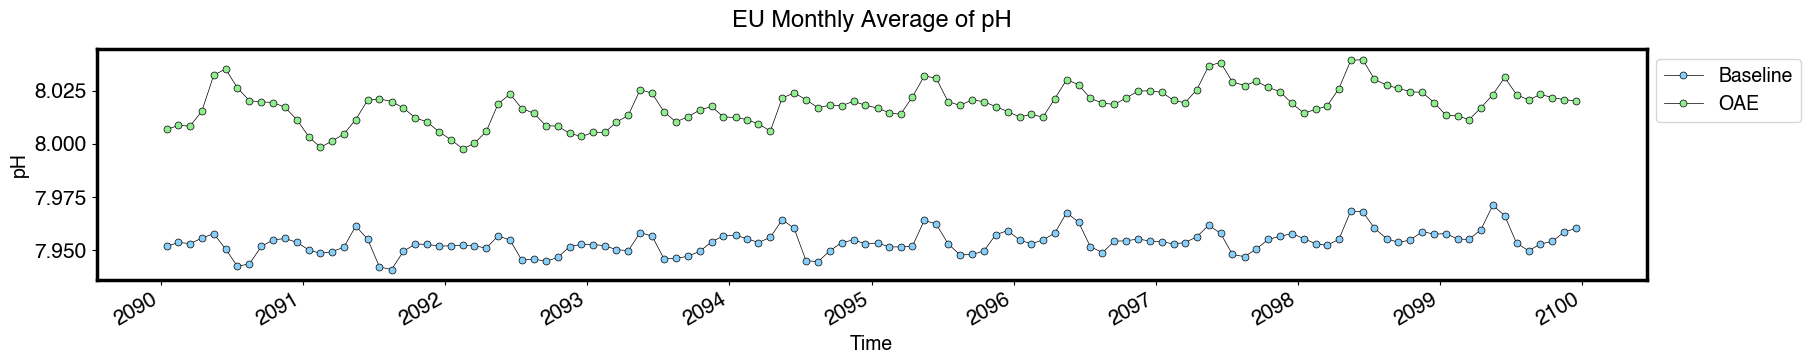

In [44]:
f, ax = plt.subplots(figsize=(20, 3))

ph_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

ph_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of pH", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("pH", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of pH without OAE (months displayed)

In [45]:
ph_baseline_monthly = ph_monthly_mean_baseline.to_dataframe('ph')
ph_baseline_monthly['Month'] = pd.DatetimeIndex(ph_baseline_monthly.index).month

In [46]:
conditions = [
    (ph_baseline_monthly['Month'] == 1),
    (ph_baseline_monthly['Month'] == 2),
    (ph_baseline_monthly['Month'] == 3),
    (ph_baseline_monthly['Month'] == 4),
    (ph_baseline_monthly['Month'] == 5),
    (ph_baseline_monthly['Month'] == 6),
    (ph_baseline_monthly['Month'] == 7),
    (ph_baseline_monthly['Month'] == 8),
    (ph_baseline_monthly['Month'] == 9),
    (ph_baseline_monthly['Month'] == 10),
    (ph_baseline_monthly['Month'] == 11),
    (ph_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_baseline_monthly['Month'] = np.select(conditions, values)

In [47]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

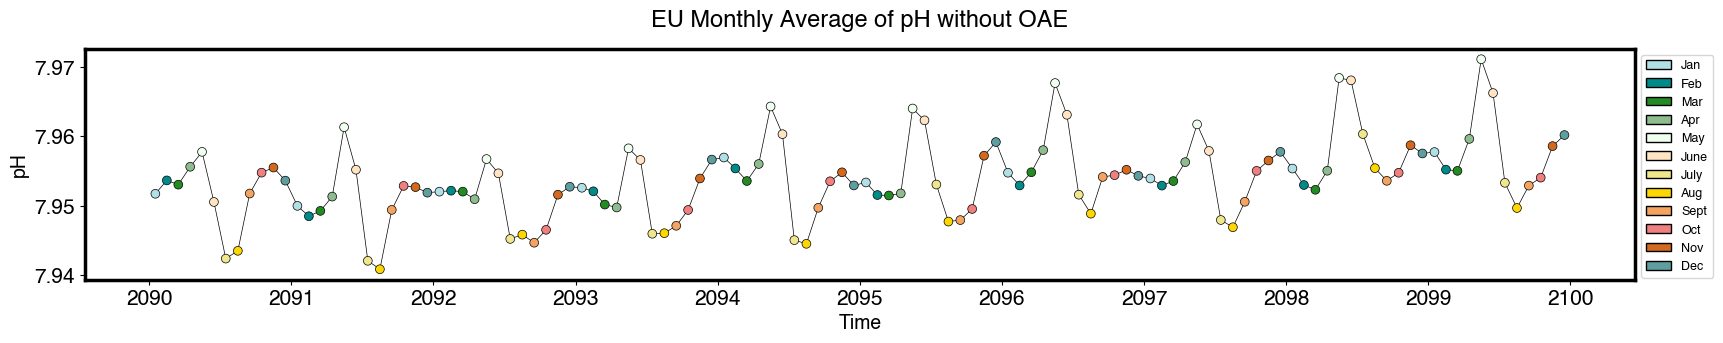

In [48]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("EU Monthly Average of pH without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of pH with OAE (months displayed)

In [49]:
ph_oae_monthly = ph_monthly_mean_oae.to_dataframe('ph')
ph_oae_monthly['Month'] = pd.DatetimeIndex(ph_oae_monthly.index).month

In [50]:
conditions = [
    (ph_oae_monthly['Month'] == 1),
    (ph_oae_monthly['Month'] == 2),
    (ph_oae_monthly['Month'] == 3),
    (ph_oae_monthly['Month'] == 4),
    (ph_oae_monthly['Month'] == 5),
    (ph_oae_monthly['Month'] == 6),
    (ph_oae_monthly['Month'] == 7),
    (ph_oae_monthly['Month'] == 8),
    (ph_oae_monthly['Month'] == 9),
    (ph_oae_monthly['Month'] == 10),
    (ph_oae_monthly['Month'] == 11),
    (ph_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

ph_oae_monthly['Month'] = np.select(conditions, values)

In [51]:
colors = dict(zip(ph_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

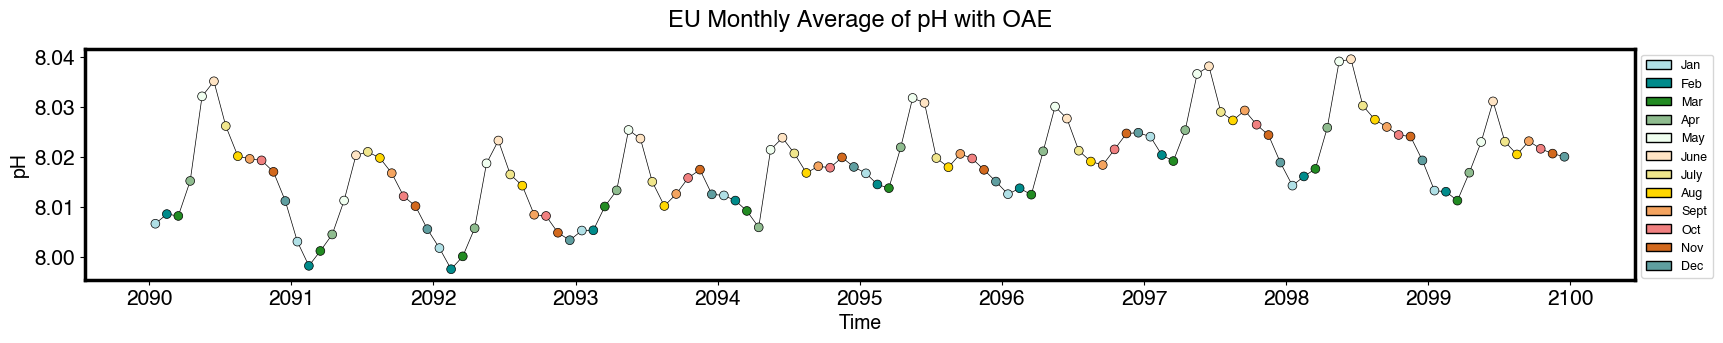

In [52]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("EU Monthly Average of pH with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of pH (months displayed)

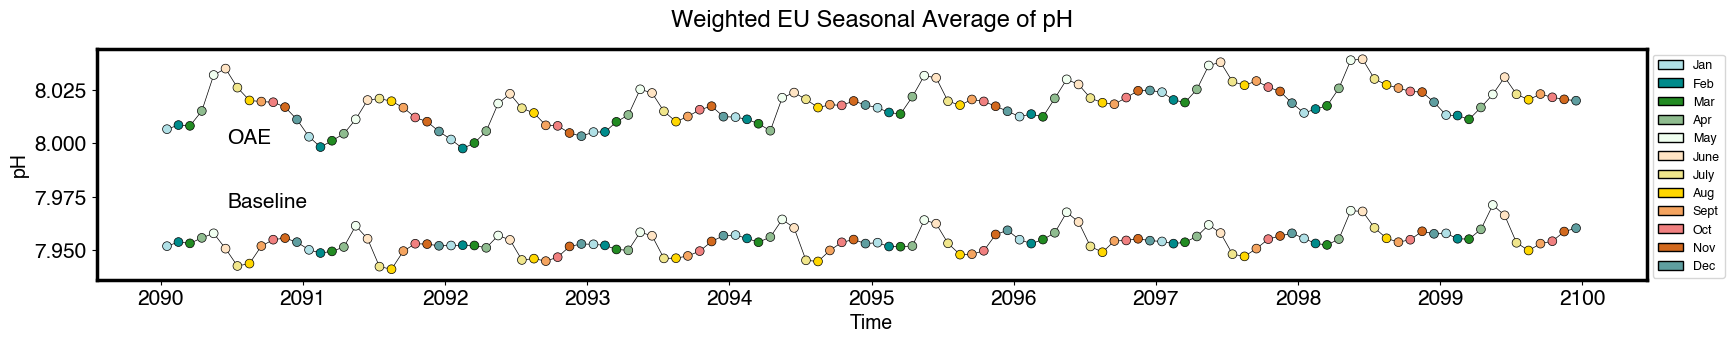

In [79]:
colors = dict(zip(ph_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(ph_baseline_monthly.index, ph_baseline_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 7.97, s='Baseline')
ax.scatter(ph_baseline_monthly.index, ph_baseline_monthly.ph, color=ph_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(ph_oae_monthly.index, ph_oae_monthly.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 8, s='OAE')
ax.scatter(ph_oae_monthly.index, ph_oae_monthly.ph, color=ph_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('pH', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of pH", fontsize=17, y=1.06)

#plt.savefig('EUpH_monthly_mean.png')

pass

### Δ pH between Baseline and OAE

In [54]:
delta_ph = ph_oae_monthly.ph - ph_baseline_monthly.ph

In [55]:
delta_ph = delta_ph.to_xarray()

In [56]:
delta_ph = delta_ph.to_dataframe('ph')
delta_ph['Month'] = pd.DatetimeIndex(delta_ph.index).month

In [57]:
conditions = [
    (delta_ph['Month'] == 1),
    (delta_ph['Month'] == 2),
    (delta_ph['Month'] == 3),
    (delta_ph['Month'] == 4),
    (delta_ph['Month'] == 5),
    (delta_ph['Month'] == 6),
    (delta_ph['Month'] == 7),
    (delta_ph['Month'] == 8),
    (delta_ph['Month'] == 9),
    (delta_ph['Month'] == 10),
    (delta_ph['Month'] == 11),
    (delta_ph['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_ph['Month'] = np.select(conditions, values)

In [58]:
colors = dict(zip(delta_ph.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

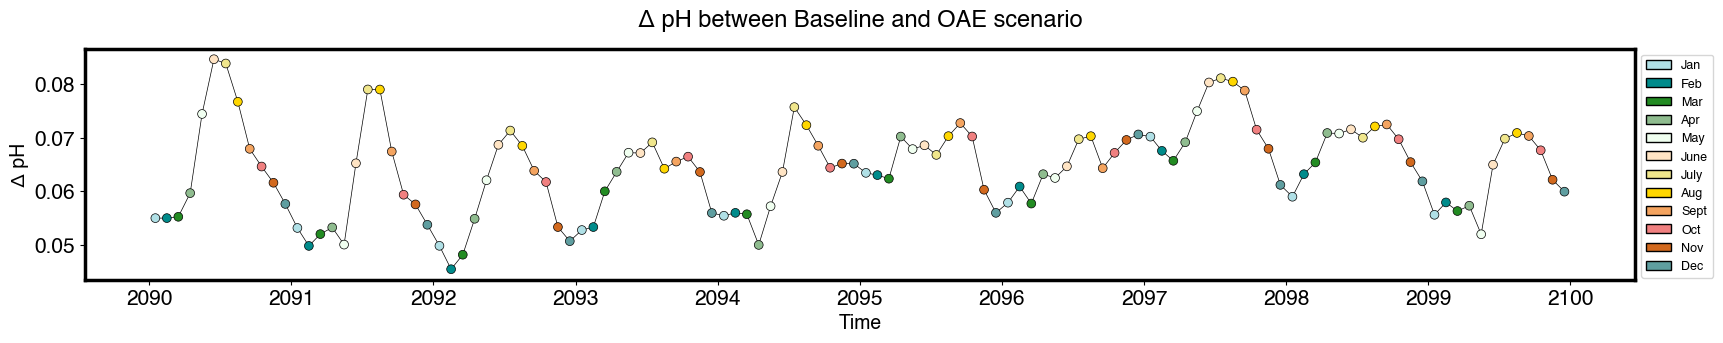

In [78]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_ph.index, delta_ph.ph, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_ph.index, delta_ph.ph, color=delta_ph.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ pH', fontsize=14)
ax.set_title("Δ pH between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('EUpH_Δ.png')

pass

### pH Annual Amplitude without OAE

In [60]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [61]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmax().values]

In [62]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmin().values]

In [63]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [64]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [65]:
ph_amplitude_baseline = year_max_baseline['ph'] - year_min_baseline['ph']

In [66]:
ph_amplitude_baseline = ph_amplitude_baseline.to_xarray()

In [67]:
ph_amplitude_baseline = ph_amplitude_baseline.to_dataset()

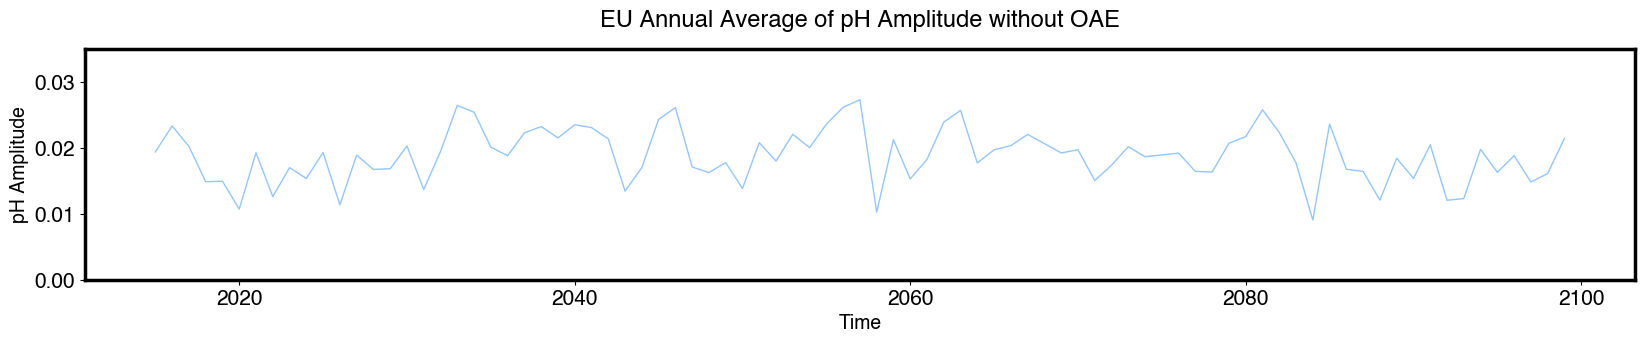

In [68]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_baseline.year, ph_amplitude_baseline.ph, linewidth=2)
plt.ylim(0, 0.035)
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Average of pH Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH Annual Amplitude with OAE

In [69]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [70]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmax().values]

In [71]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ph'].idxmin().values]

In [72]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [73]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [74]:
ph_amplitude_oae = year_max_oae['ph'] - year_min_oae['ph']

In [75]:
ph_amplitude_oae = ph_amplitude_oae.to_xarray()

In [76]:
ph_amplitude_oae = ph_amplitude_oae.to_dataset()

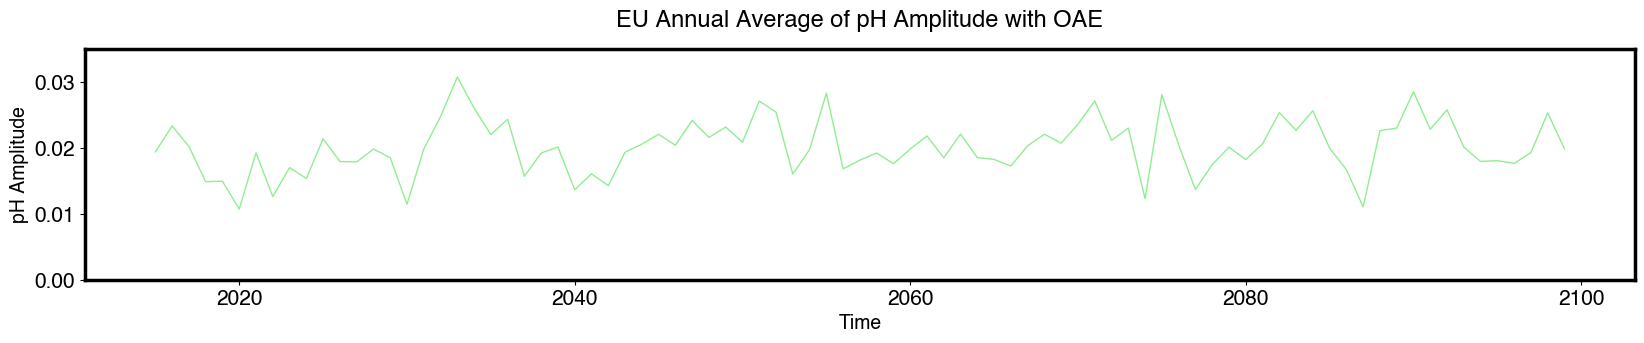

In [77]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_oae.year, ph_amplitude_oae.ph, linewidth=2, color='lightgreen')
plt.ylim(0, 0.035)
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Average of pH Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### pH Annual Amplitude with and without OAE

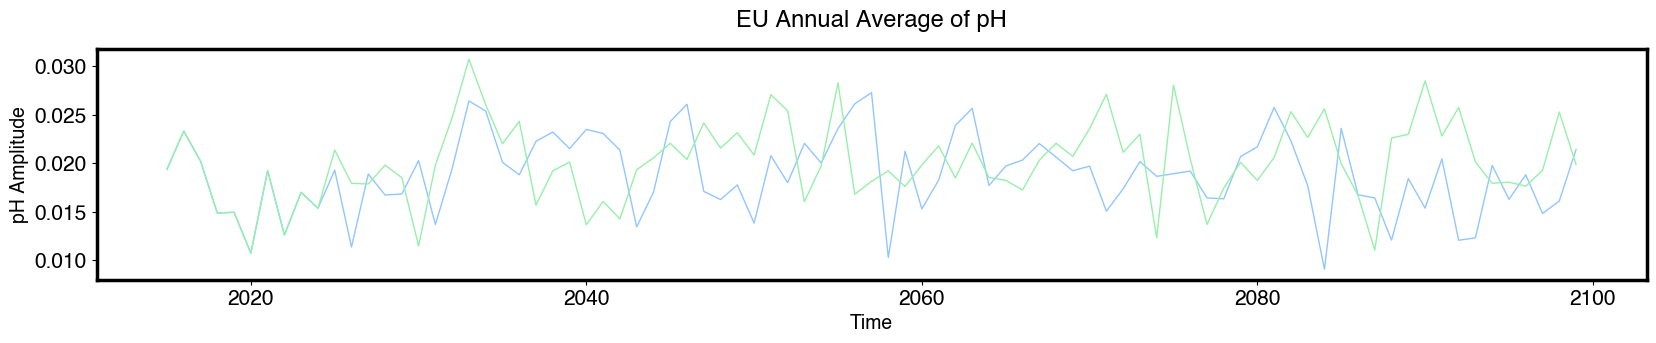

In [83]:
plt.figure(figsize=(20, 3))
plt.plot(ph_amplitude_baseline.year, ph_amplitude_baseline.ph, linewidth=2, label = 'Baseline')
plt.plot(ph_amplitude_oae.year, ph_amplitude_oae.ph, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("pH Amplitude", fontsize=14)
plt.title('EU Annual Average of pH', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()